# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

In [808]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [809]:
data_df = pd.read_csv("data.csv")
data_df = data_df.sample(frac = 1).reset_index(drop = True).dropna(axis = 0)

In [810]:
# Data exploration of categorical variables:

print("Category types by variable:")
for col in data_df[["Gender","Customer Type","Type of Travel", "Class"]].columns:
    print(col + ":", end=" ")
    print (data_df[col].unique())

Category types by variable:
Gender: ['Male' 'Female']
Customer Type: ['disloyal Customer' 'Loyal Customer']
Type of Travel: ['Business travel' 'Personal Travel']
Class: ['Business' 'Eco' 'Eco Plus']


In [811]:
# Data Cleaning
# Find and replace binary categories to numerical values of 0 and 1.
convert_strings_to_nums = {"satisfaction":     {"satisfied": 1, "dissatisfied": 0},
                           "Gender":     {"Female": 0, "Male": 1},
                           "Customer Type": {"Loyal Customer": 1, "disloyal Customer": 0 },
                           "Type of Travel": {"Personal Travel": 0, "Business travel": 1}}

data_df = data_df.replace(convert_strings_to_nums)

# Find and replace method is not enough for the "Class" variable as it has 3 categories instead of 2. So, we
# hot-encode the "Class" column by converting each category into a new column and assign 1 or 0 to denote True/False pairs.
data_df = pd.get_dummies(data_df, columns=["Class"])
list(data_df.columns)

# As can be seen below, we now have three new columns at the bottom named "Class_business", "Class_Eco", and "Class_Eco Plus"
# replacing the old "Class" column:

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

In [812]:
# Grouping data into x (predictor variables) and y (response variable) tables.
y = data_df[["satisfaction"]]
x = data_df.loc[:, data_df.columns != "satisfaction"]

# Check the newly formed tables.
display(y.head(5))
display(x.head(5))

#print(len(y)

,satisfaction
0,0
1,1
2,1
3,0
4,1


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,35,1,1350,1,1,1,1,2,...,5,4,3,5,2,77,84.0,1,0,0
1,1,1,43,1,1655,4,4,4,4,4,...,5,1,4,2,4,0,0.0,0,1,0
2,0,1,18,0,1948,0,1,1,3,2,...,2,2,1,2,2,15,10.0,0,1,0
3,1,0,38,1,2036,1,1,1,1,1,...,4,5,3,4,1,0,0.0,1,0,0
4,1,1,58,0,1545,0,5,0,3,4,...,4,4,3,4,4,11,15.0,0,1,0


In [813]:
# Importing Train test split
from sklearn.model_selection import train_test_split

In [814]:
# train set of size 0.70
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 1) 

# test set of size 0.20, rest is validation 0.10
# (2/3) x 0.3 = 0.2
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size = (2/3), random_state = 1) 

# Check the length of newly formed split tables.
len(x_train),len(x_test),len(x_validation)


(1211, 173, 346)

In [815]:
# Creating the kNN regressor Classifier:
# importing KNN regressor
from sklearn.neighbors import KNeighborsClassifier as KNN_C
from sklearn.neighbors import kneighbors_graph

In [816]:
# importing accuracy score for error rate calculation in the validation step
from sklearn.metrics import accuracy_score


In [817]:
# Defining a cross-validation function for kNN by using accuracy as score metric.

def accuracy_for_k (k1: int, k2: int, minkowski_p: int):
    accuracy_list = []
    for k in range(k1, k2):
        knn_model = KNN_C(n_neighbors = k, p = minkowski_p)
        knn_model.fit(x_train, y_train)
        y_predict = knn_model.predict(x_validation)
        accuracy_i = accuracy_score(y_validation, y_predict)
        accuracy_list.append(accuracy_i)

    return accuracy_list

In [818]:
# Calling the function twice to generate accuracy metrics for L1 and L2 methods respectively over the k-values between 1-40:

accuracy_list1 = error_rates_for_k(1,40,1)
accuracy_list2 = error_rates_for_k(1,40,2)


In [819]:
# Conversion to DataFrame format and extra touches:

accuracy_list1 = pd.DataFrame(data=accuracy_list1)
accuracy_list1.insert(0,'K',range(1,40), False)
accuracy_list1.rename(columns={ accuracy_list1.columns[1]: "Accuracy" }, inplace = True)

accuracy_list2 = pd.DataFrame(data=accuracy_list2)
accuracy_list2.insert(0,'K',range(1,40), False)
accuracy_list2.rename(columns={ accuracy_list2.columns[1]: "Accuracy" }, inplace = True)

Text(0, 0.5, 'Accuracy')

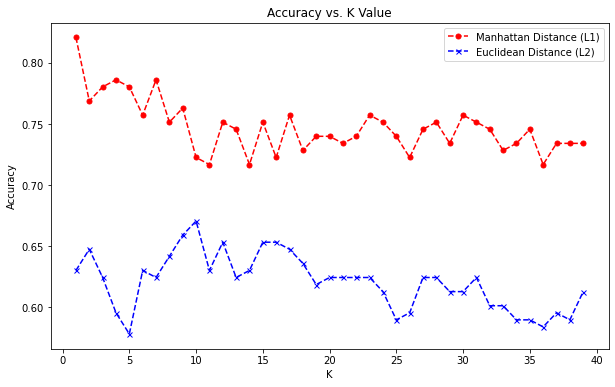

In [820]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list1['Accuracy'],color='red', linestyle='dashed', marker='o', label='Manhattan Distance (L1)',
 markerfacecolor='red', markersize=5)
plt.plot(range(1,40),accuracy_list2['Accuracy'],color='blue', linestyle='dashed', marker='x', label='Euclidean Distance (L2)',
 markerfacecolor='blue', markersize=5)
plt.legend()
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [821]:
# Cross-validation for kNN:

# As seen in the above graph, the overall accuracy of the model using the L1 method (p=1) is superior to the 
# model using L2 (p=2) even though the data is shuffled in every run. 

# Get the best performing k-value and its accuracy among the L1 method (p=1), red line:
accuracy_best = k_best = accuracy_list1.max()["Accuracy"]
k_best = accuracy_list1.idxmax()["Accuracy"] + 1

In [822]:
print ("Among the kNN regressors, the best performing model in terms of accuracy is the one with Minkowski p-value of 1,")
print("and its k value is " + str(k_best) + " with an accuracy of " + str(accuracy_best) + ".\n")

# Testing the best performing kNN model over the test dataset:
knn_model = KNN_C(n_neighbors = k_best, p = 1)
knn_model.fit(x_train, y_train)
y_predict_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print('Overall accuracy for the best performing kNN regressor (with k = 17 and p = 1):')
print(accuracy_knn)

Among the kNN regressors, the best performing model in terms of accuracy is the one with Minkowski p-value of 1,
and its k value is 1 with an accuracy of 0.8208092485549133.

Overall accuracy for the best performing kNN regressor (with k = 17 and p = 1):
0.8208092485549133


In [823]:
# Creating the Logistic Regression Classifier:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict_lr = lr.predict(x_test)

In [824]:
# Cross Validation  
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x, y, cv=10)
scores.sort()
accuracy_lr = scores.mean()

print(scores)
print()
print("Overall accuracy for the Logistic Regression Classifier after cross validation: ")
print(accuracy_lr)

[0.95953757 0.96531792 0.96531792 0.97109827 0.97109827 0.97109827
 0.97687861 0.97687861 0.98265896 0.99421965]

Overall accuracy for the Logistic Regression Classifier after cross validation: 
0.9734104046242773


In [825]:
# Model Comparison
print('Overall accuracy for the best performing kNN regressor (with k = 17 and p = 1):')
print(accuracy_knn)
print()

print("Overall accuracy for the Logistic Regression Classifier after cross validation: ")
print(accuracy_lr)
print()

print ("As seen above, Logistic Regression Classifier has a cross-validated mean accuracy of " + str(accuracy_lr) + " whereas")
print("the best performing kNN regressor has an accuracy value of " + str(accuracy_knn) + ". This shows us that the Logistic")
print("Regression Classifier vastly outperforms the kNN model and has a very high accuracy value with only a margin of error")
print("of about 5%.")

Overall accuracy for the best performing kNN regressor (with k = 17 and p = 1):
0.8208092485549133

Overall accuracy for the Logistic Regression Classifier after cross validation: 
0.9734104046242773

As seen above, Logistic Regression Classifier has a cross-validated mean accuracy of 0.9734104046242773 whereas
the best performing kNN regressor has an accuracy value of 0.8208092485549133. This shows us that the Logistic
Regression Classifier vastly outperforms the kNN model and has a very high accuracy value with only a margin of error
of about 5%.


Test dataset size: n = 173


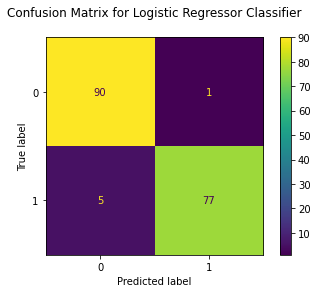

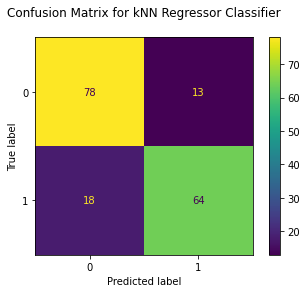

In [826]:
# Plot Confusion Matrices
from sklearn.metrics import plot_confusion_matrix

print("Test dataset size: n = " + str(len(x_test)))
plot_confusion_matrix(lr, x_test, y_test)  
plt.title("Confusion Matrix for Logistic Regressor Classifier\n")
plt.show()

plot_confusion_matrix(knn_model, x_test, y_test)  
plt.title("Confusion Matrix for kNN Regressor Classifier\n")
plt.show()

As seen in the above confusion matrices, the accuracy values for the both models are identical to what we have found
in the previous part, with Logistic Regressor outperforming the kNN Regressor with an accuracy value around 95% - 97%.

Text(0.5, 1.0, 'Precision-Recall (PR) Curve\n Logistic vs. kNN Regression\n')

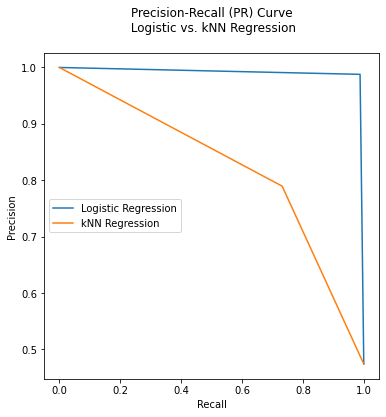

In [827]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(recall_lr, precision_lr, label='Logistic Regression')
ax.plot(recall_knn, precision_knn, label='kNN Regression')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left')
plt.title("Precision-Recall (PR) Curve\n Logistic vs. kNN Regression\n")

As seen on the above Precision-Recall Curve, Logistic Regression is very close to the 'ideal' spot on the top-right corner
which denotes the perfect precision and recall values of 1.0. This is also in line with what we have observed in the previous
parts when we observed a very high precision value for the Logistic Regression Model.

However, the kNN Regressor comes short as its curve is quite far from the ideal top-right corner, as there is a clear trade-off
between its recall and precision values onb the either side of the curve. The area under the curve is also significantly lower than that of logistic regression.